In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import model_from_json
_model = None


def load_modal():
    print("Loaading Model------------------")
    global _model
    model_path = "model.h5" 
    _model = tf.keras.models.load_model(model_path, custom_objects={'GlorotUniform': glorot_uniform()})
    print(_model.summary())
    print("Modal succefully running")

def preprocess_image(image):
    original_shape = image.shape
    resized_img = cv2.resize(image, (500, 500))
    formatted_img = np.expand_dims(resized_img, axis=0)
    return original_shape, formatted_img

def get_prediction(image):
    global _model
    if _model == None:
        load_modal()
    prediction = _model.predict(image)
    predicted_img = prediction[0]
    return predicted_img

def post_process_image(predicted_img, original_shape):
    original_size_img = cv2.resize(predicted_img, (original_shape[1], original_shape[0]))
    rgb_img = cv2vtColor(original_size_img.astype(np.uint8), cv2.COLOR_BGR2RGB)
    return original_size_img

def convert_image(image):
    shape,image = preprocess_image(image)
    prediction = get_prediction(image)
    rgb_img = post_process_image(prediction, shape)
    return rgb_img
load_modal()


2024-08-27 11:43:22.401400: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-27 11:43:22.405028: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-27 11:43:22.416428: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-27 11:43:22.434572: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-27 11:43:22.439874: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-27 11:43:22.454626: I tensorflow/core/platform/cpu_feature_gu

Loaading Model------------------


2024-08-27 11:43:25.958690: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-08-27 11:43:25.958739: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: taslim-Aspire-A715-75G
2024-08-27 11:43:25.958748: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: taslim-Aspire-A715-75G
2024-08-27 11:43:25.958865: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 535.183.1
2024-08-27 11:43:25.958886: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version is: 535.183.1
2024-08-27 11:43:25.958892: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:249] kernel version seems to match DSO: 535.183.1


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 500, 500,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 500, 500,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 500, 500,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 500, 500,  │      4,640 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 500, 500,  │      8,256 │ conv2d_3[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 500, 500,  │      8,256 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 500, 500,  │     16,448 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 500, 500,  │          0 │ conv2d_2[0][0],   │
│                     │ 64)               │            │ conv2d_4[0][0],   │
│                     │                   │            │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 500, 500,  │     36,928 │ add[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 500, 500,  │     18,464 │ add[0][0]         │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 500, 500,  │     18,464 │ conv2d_6[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 500, 500,  │      2,064 │ conv2d_9[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 500, 500,  │      4,112 │ add[0][0]         │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 500, 500,  │      2,064 │ conv2d_7[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 500, 500,  │          0 │ conv2d_10[0][0],  │
│                     │ 16)               │            │ conv2d_11[0][0],  │
│                     │                   │            │ conv2d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 500, 500,  │      9,232 │ add[0][0]         │
│                     │ 16)               │            │                 

 Total params: 134,069 (523.71 KB)

 Trainable params: 134,067 (523.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None
Modal succefully running


In [2]:
import matplotlib.pyplot as plt


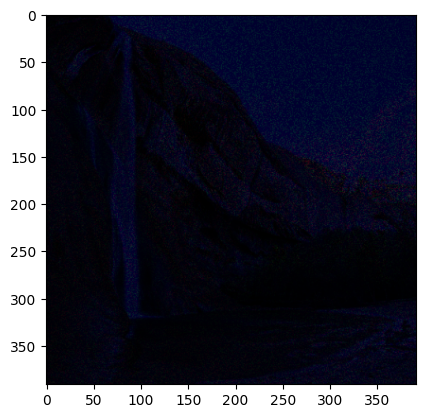

In [3]:
img = cv2.imread("test1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


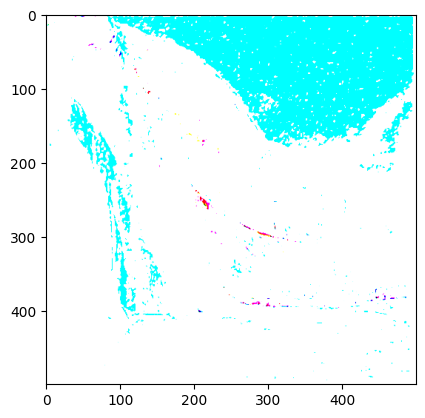

In [8]:
img = cv2.resize(img, (500, 500))
img = np.expand_dims(img, axis=0)
img = _model.predict(img)
img = img[0]
plt.imshow(img)

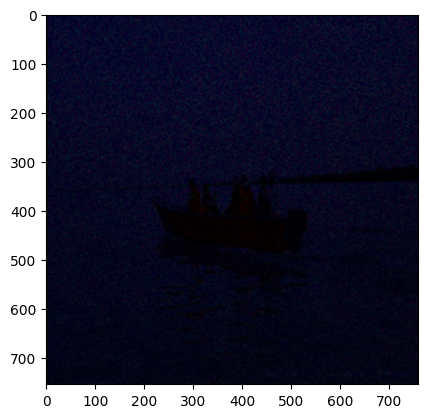

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step


AttributeError: module 'cv2' has no attribute 'imwite'

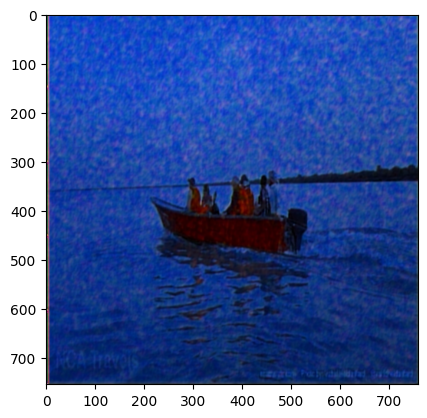

In [63]:
img = cv2.imread("test3.png")
original_shape = img.shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img = cv2.resize(img,(500,500))
img = img.reshape(1,500,500,3)
Prediction = _model.predict(img)
Prediction = Prediction.reshape(500,500,3)
img[:,:,:] = Prediction[:,:,:]
img = img.reshape(500,500,3)
img = cv2.resize(img, (original_shape[1], original_shape[0]))
plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

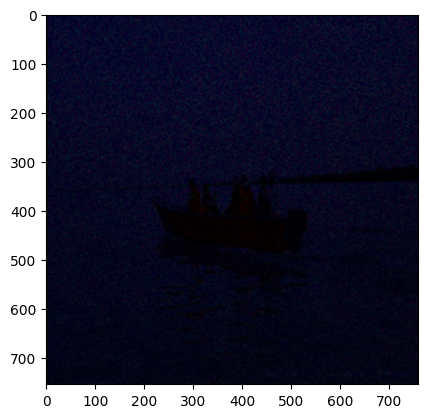

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


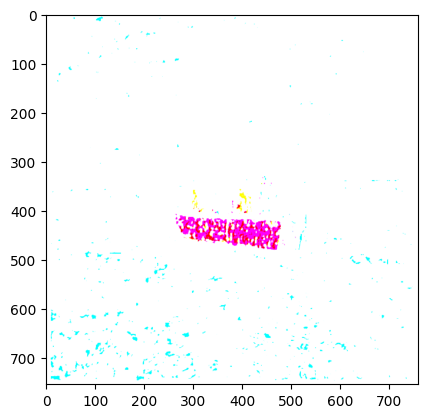

In [61]:
img = cv2.imread("test3.png")
original_shape = img.shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

img = cv2.resize(img, (500, 500))
img = img.reshape(1, 500, 500, 3)

Prediction = _model.predict(img)
img = Prediction.reshape(500, 500, 3)

# Normalize the image data
# img = (img - img.min()) / (img.max() - img.min())  # Scales to [0, 1]
# img = (img * 255).astype(np.uint8)  # Scales to [0, 255] and converts to integers

img = cv2.resize(img, (original_shape[1], original_shape[0]))
plt.imshow(img)
plt.show()


In [65]:
cv2.imwrite("result.jpg", img)

True